In [16]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import norm
import matplotlib.ticker as mticker

In [17]:
sns.set_style('darkgrid')
sns.set_palette("Blues_r")
sns.set(font_scale=1.20, rc={'figure.figsize':(12,6)})
sns.set_context(rc={"axes.facecolor": ".9", "axes.titlesize":16,"axes.labelsize":15})

In [18]:
hdf = pd.read_csv("data/heights_weights.csv")['Height(Inches)']

## Normal approximation

The process of using the normal curve to estimate the shape of the distribution of a data set. Finding areas under the normal curve is called **normal approximation**.

What percentage of fathers have heights between $ 67.4 $ in and $ 71.9 $ in. Knowing that $\tilde{x} = 68.3$ in and  ${s} = 1.8$ in.

* 1 Standardize data:

    $\frac{ 67.4 in - 68.3 in}{1.8 in} = -0.5 ~~~~~~~~~\frac{ 71.9 in - 68.3 in}{1.8 in} = 2 $

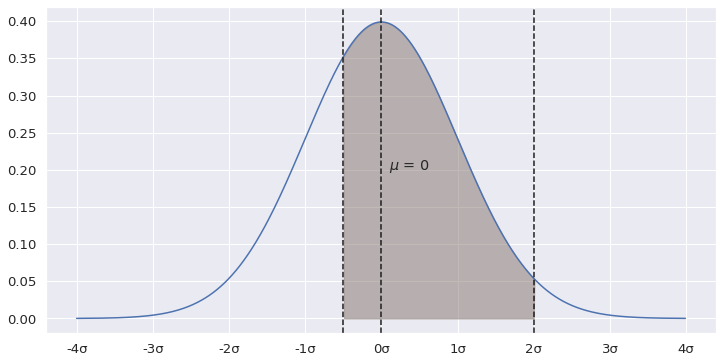

In [19]:

mu = 0
variance = 1
sigma = math.sqrt(variance)

# Create the curve from -4σ to 4σ
x = np.arange(mu - 4*sigma, mu + 4*sigma, 0.01)
y = norm.pdf(x, mu, sigma)

ax = sns.lineplot(x=x, y=y)
kde_x, kde_y = ax.lines[0].get_data()

# The number os standard deviations to plot
n = 2
a_1 = (-0.5)
a_2 = (2)

ticks_loc = ax.get_xticks().tolist()
ax.set_xticks(ticks_loc)
ax.set_xticklabels([f'{x:,.0f}σ' for x in ticks_loc])

ax.axvline(0, color = 'k', linestyle="--")
ax.axvline(-0.5, color = 'k', linestyle="--")
ax.axvline(2, color = 'k', linestyle="--")


ax.annotate(f'$\mu$ = 0', xy=(0.1, 0.2))

_ = ax.fill_between(kde_x, kde_y, 
where=(kde_x > a_1) & (kde_x < a_2) , 
interpolate=True, color='#85756d', alpha=0.50)

* 2. Calculate the shaded area

In [20]:
area_whitin = y[(x>-0.5) & (x<2)].sum()
area_whitin

66.7219590731085

The empirical rule is a special case of the **normal approximation**